In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import path
path = '/content/drive/MyDrive/CSV/dataset k-means clustering/Shopping_CustomerData.csv'
df = pd.read_csv(path)

df.describe()

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


In [ ]:
df

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,Female,54,Delhi,317466.42070,601,52,4
196,1197,Female,20,Bengaluru,323305.50020,554,58,1
197,1198,Male,44,Chennai,109058.54430,844,36,2
198,1199,Male,28,Delhi,160116.89300,837,24,4


In [ ]:
df_new = df[["CustomerAge","SpendingScore"]] #Menslicing data yang akan di analisis
df_new.head

<bound method NDFrame.head of      CustomerAge  SpendingScore
0             49             78
1             59             63
2             54             69
3             42             30
4             30              6
..           ...            ...
195           54             52
196           20             58
197           44             36
198           28             24
199           41             31

[200 rows x 2 columns]>

In [ ]:
df_new.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


In [ ]:
df_new.isnull().sum() #mencari apakah ada data yang NULL

CustomerAge      0
SpendingScore    0
dtype: int64

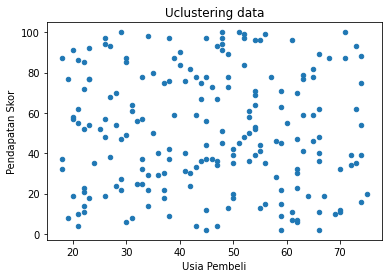

In [ ]:
df.plot(kind='scatter', x='CustomerAge', y='SpendingScore')
#plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.xlabel('Usia Pembeli')
plt.ylabel('Pendapatan Skor')
plt.title ('Uclustering data')
plt.show()

Tahap Awal Penerapan K-Means Clustering.
berikut adalah tahapannya :
1. Mengansumsikan nilai K
2. Menentukan Random Centroid
3. Menentukan Random Seed. kita ambil contoh 40

In [ ]:
#Step-1
k = 3 #Assuming the value of k to be 3
np.random.seed(40)

#Here, we are selecting three points randomly as centroids 
random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])#Here, we have selecting the random values between 1 and 100 because most of of our values lie in this range
print('Randomly selected points as random_centroids:',random_centroids)

Randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]


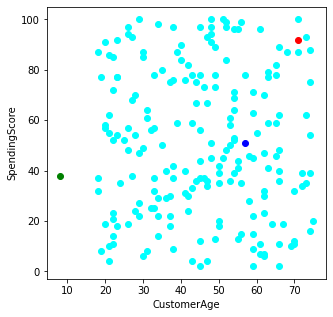

In [ ]:
#Here, we are plotting the random_centroids that we selected previously
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()

In [ ]:
#Langkah kedua

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new 

In [ ]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,CustomerAge,SpendingScore,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,49,78,26.076810,57.280014,28.160256,0,r
1,59,63,31.384710,56.797887,12.165525,2,b
2,54,69,28.600699,55.470713,18.248288,2,b
3,42,30,68.447060,34.928498,25.806976,2,b
4,30,6,95.273291,38.832976,52.478567,1,g


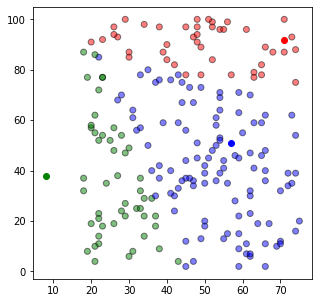

In [ ]:
#Penempatan Cluster
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])

In [ ]:
#Step-3

#Update Stage
#In this satge, we are updating the centroids of the newly formed clusters
def update(parameter):
    for i in range(length):
        random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['CustomerAge'])
        random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['SpendingScore'])
    return parameter

In [ ]:
random_centroids = update(random_centroids)
random_centroids

[[49.16279069767442, 90.09302325581395],
 [26.387755102040817, 35.97959183673469],
 [52.75, 41.7037037037037]]

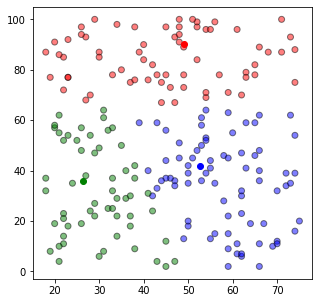

In [ ]:
#Repeat Assignment Step
#Here, we are again calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
df_new = assignment(df_new, random_centroids)  
df_new.head()
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()

In [ ]:
#Step-4

#In this step, we are going to keep repeating the update centroid and the assignment stage until the centroids stop changing i.e. No New Clusters being formed.
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
  
  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)#np.allclose() function checks if two arrays are equal element-wise
  print(result)
  if result == True:
    break
  
    
print(count)

Old Centroid [[49. 90.]
 [26. 36.]
 [53. 42.]]
New Centroid [[45. 85.]
 [30. 32.]
 [58. 35.]]
False
Old Centroid [[45. 85.]
 [30. 32.]
 [58. 35.]]
New Centroid [[45. 82.]
 [30. 31.]
 [59. 33.]]
False
Old Centroid [[45. 82.]
 [30. 31.]
 [59. 33.]]
New Centroid [[45. 82.]
 [31. 30.]
 [60. 32.]]
False
Old Centroid [[45. 82.]
 [31. 30.]
 [60. 32.]]
New Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
False
Old Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
New Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
True
6


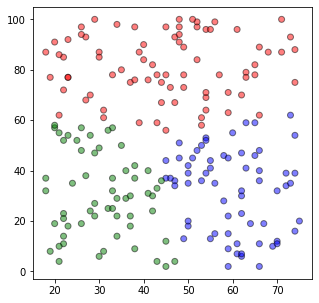

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
plt.show()

In [ ]:
#Here, we will take only two features and top 400 entries of each feature from the dataset just to make it easy to visualize the steps.
df = df[["CustomerAge","SpendingScore"]]
df.head()

,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [ ]:
#Here, we are assuming the value of k as 5
kmeans = KMeans(n_clusters=3)#Creating a K-Means Object
kmeans.fit(df)#Fitting the Model

KMeans(n_clusters=3)

In [ ]:
#Here, we are generating Labels of each point
labels = kmeans.predict(df)
labels

array([1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 2], dtype=int32)

In [ ]:
#printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[47.06756757, 47.05405405],
       [44.82089552, 84.65671642],
       [44.37288136, 16.72881356]])

In [ ]:
#melihat inersia k-means
kmeans.inertia_

69228.85879694519

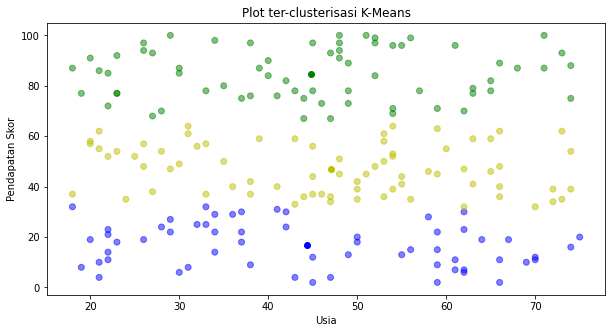

In [ ]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'} #penentuan warna plot
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df['CustomerAge'], df['SpendingScore'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Usia')
plt.ylabel('Pendapatan Skor')
plt.title('Plot ter-clusterisasi K-Means')
plt.show()

In [ ]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

In [ ]:
inertia_list

[215843.515,
 93076.9609500805,
 69240.59269514497,
 52510.21384913896,
 38741.97371675943,
 30120.51301535344,
 25034.800566356385,
 21592.64582010582,
 19300.16985470376,
 16910.634124005795,
 15033.915543610156,
 13580.466865079365,
 12422.486457007046,
 11459.98154788366,
 10513.079457530775,
 9817.587930112542,
 9382.987634914107,
 8574.147645736615,
 7907.989750527251,
 7756.301731601732]

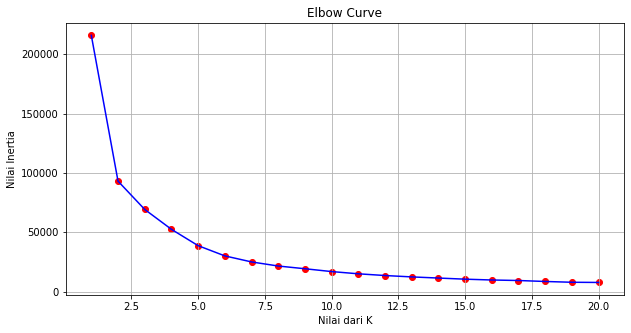

In [ ]:
#Plotting menggunakan elbow curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai dari K')
plt.ylabel('Nilai Inertia')
plt.title('Elbow Curve')
plt.show()